## SME0828 - Introdução à Ciência de Dados

Aluno: Natan Henrique Sanches (11795680)

Entrega 2 - Análise Exploratória de Dados

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import iqr, pearsonr, spearmanr
import pandas as pd

#### 1. Gere dados a partir de uma distribuição de Poisson. Varie a taxas λ no intervalo [1,10] e mostre o gráfico da média em função da variância.

Text(0, 0.5, 'Média')

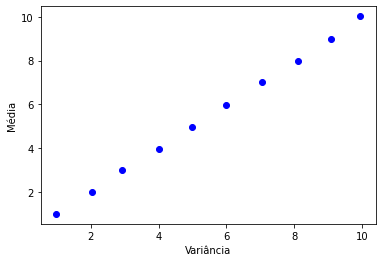

In [ ]:
mean = []
var = []

# Para i = 1, 2, ..., 10, gera-se 5000 amostras.
for i in range(1, 11):
    s = np.random.poisson(i, 5000)
    mean.append(np.mean(s))
    var.append(np.var(s))

# O gráfico se assemelha à uma reta, como esperado.
plt.plot(var, mean, 'bo')
plt.xlabel('Variância')
plt.ylabel('Média')

#### 2. Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [ ]:
iris = load_iris()
data, labels = iris.data, iris.feature_names

for i in range(len(labels)):
    col_space = data[:,i]

    mean = np.round(np.mean(col_space), decimals=3)
    print(f'Média da feature \'{labels[i]}\': {mean}')
    var = np.round(np.var(col_space), decimals=3)
    print(f'Variância da feature \'{labels[i]}\': {var}')
    iqr_val = np.round(iqr(col_space), decimals=3)
    print(f'IQR da feature \'{labels[i]}\': {iqr_val}', end='\n\n')


Média da feature 'sepal length (cm)': 5.843
Variância da feature 'sepal length (cm)': 0.681
IQR da feature 'sepal length (cm)': 1.3

Média da feature 'sepal width (cm)': 3.057
Variância da feature 'sepal width (cm)': 0.189
IQR da feature 'sepal width (cm)': 0.5

Média da feature 'petal length (cm)': 3.758
Variância da feature 'petal length (cm)': 3.096
IQR da feature 'petal length (cm)': 3.5

Média da feature 'petal width (cm)': 1.199
Variância da feature 'petal width (cm)': 0.577
IQR da feature 'petal width (cm)': 1.5



#### 3. Obtenha o boxplot de todas as variáveis da flor Iris, para cada atributo.

<Figure size 432x288 with 0 Axes>

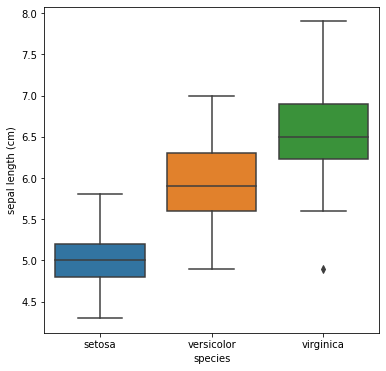

<Figure size 432x288 with 0 Axes>

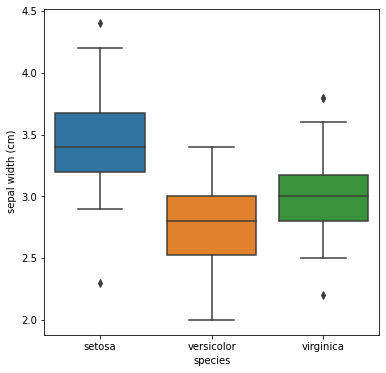

<Figure size 432x288 with 0 Axes>

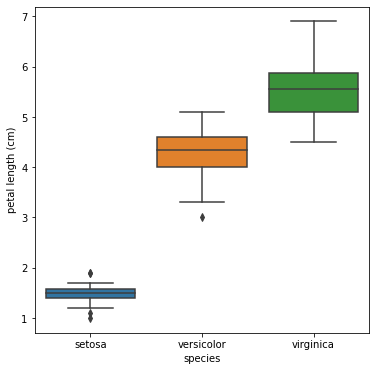

<Figure size 432x288 with 0 Axes>

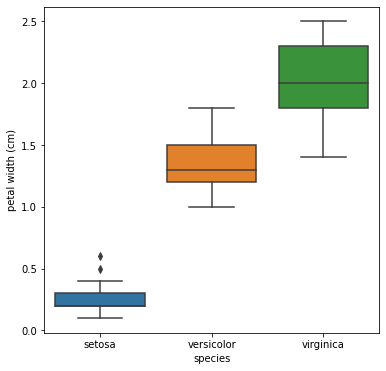

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target_names[iris.target])

for i, f in enumerate(df.columns):
    if f != 'species':
        fig = plt.figure()
        plt.figure(figsize=(6,6))
        sns.boxplot(x='species', y=f, data=df)
        plt.show()

#### 4. Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

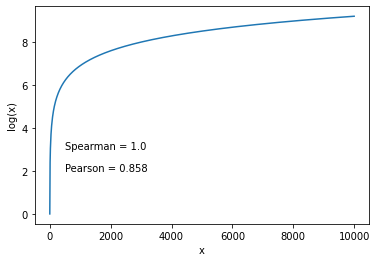

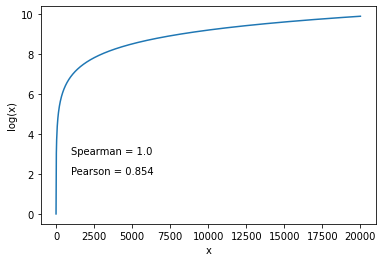

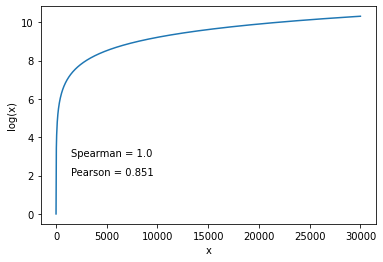

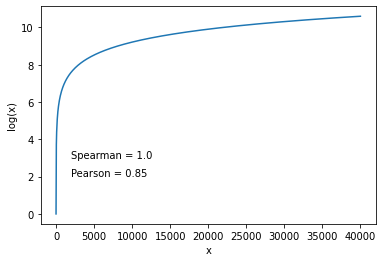

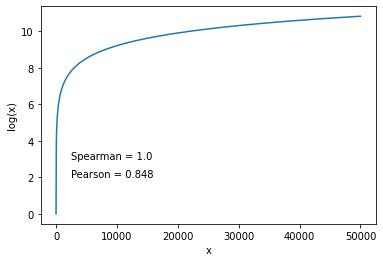

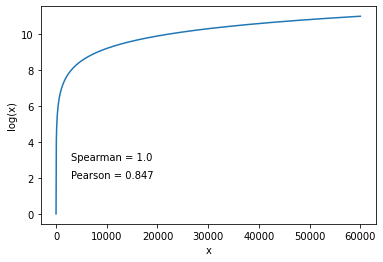

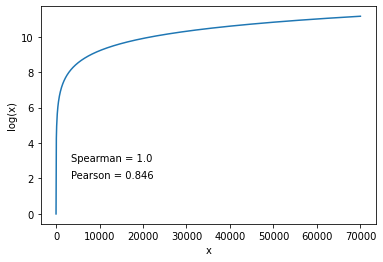

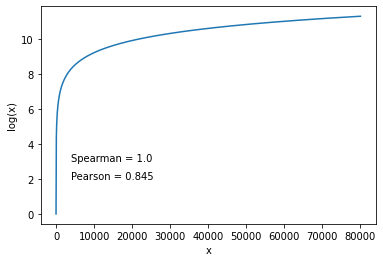

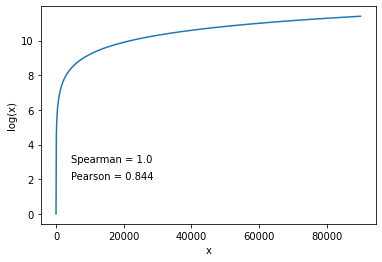

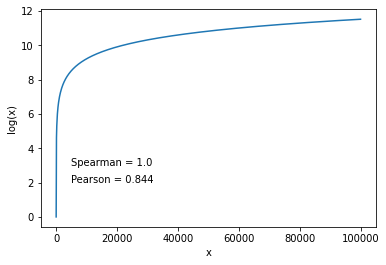

In [7]:
N = 1000

for i in range(1, 11):
    X = np.linspace(1, 10000*i, N)
    Y = np.log(X)

    corr_p, _ = pearsonr(X, Y)
    corr_p = np.round(corr_p, decimals=3)
    corr_s, _ = spearmanr(X, Y)
    corr_s = np.round(corr_s, decimals=3)

    plt.plot(X, Y)
    plt.xlabel('x')
    plt.ylabel('log(x)')
    plt.text((1000*i)/2, 2, f'Pearson = {corr_p}')
    plt.text((1000*i)/2, 3, f'Spearman = {corr_s}')
    plt.show()


#### 5. Considere o código da aula mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para Y=0.5X+ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

In [ ]:
N = 100
X = np.linspace(-1, 1, N)
error = np.random.uniform(-1, 1, N)

**Pearson**

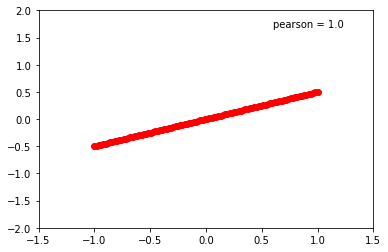

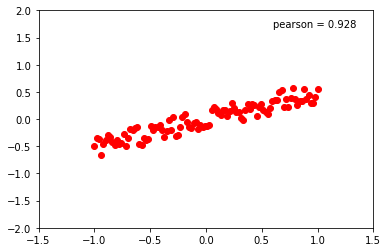

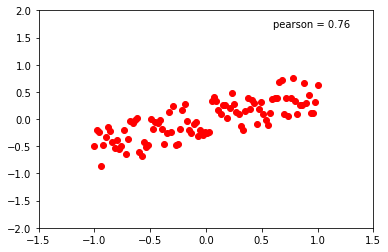

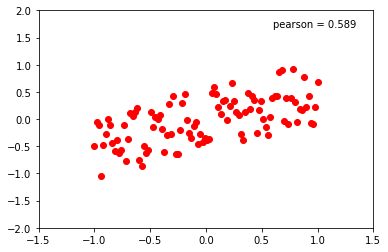

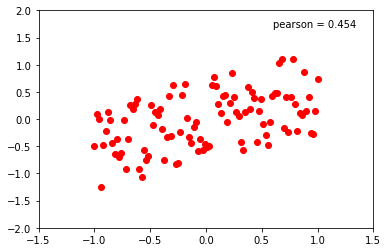

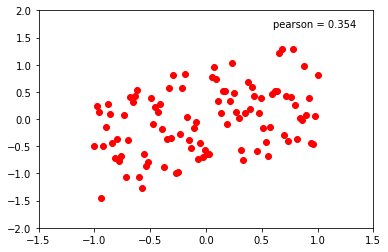

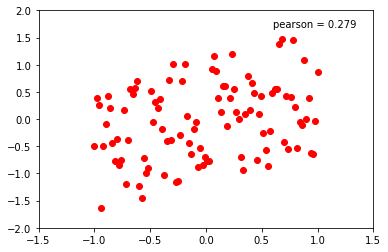

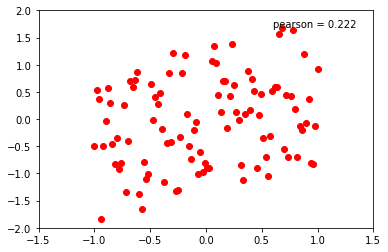

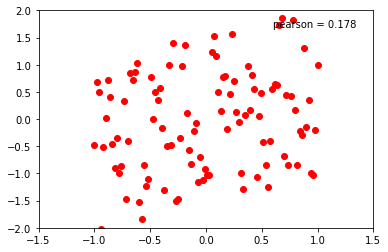

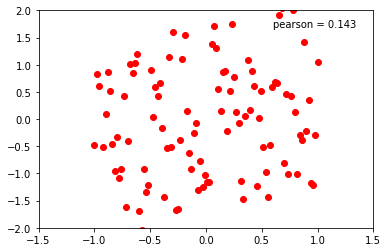

In [ ]:
for p in np.arange(0, 2, 0.2):
    Y = 0.5 * X + p*error
    plt.plot(X, Y, 'ro')
    corr_p, _ = pearsonr(X, Y)
    corr_p = np.round(corr_p, decimals=3)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-2, 2)
    plt.text(0.6, 1.7, 'pearson = ' + str(corr_p))
    plt.show()

**Spearman**

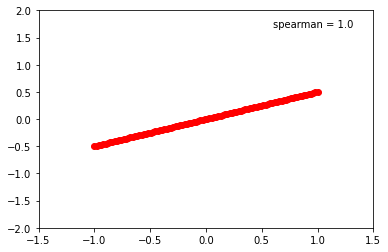

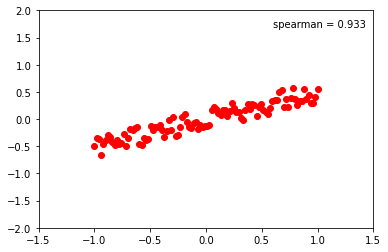

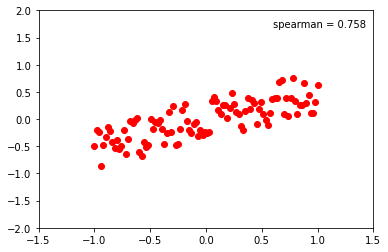

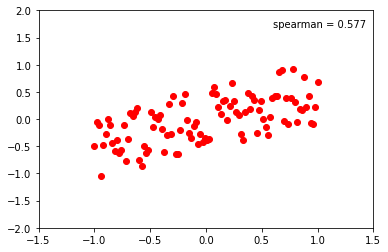

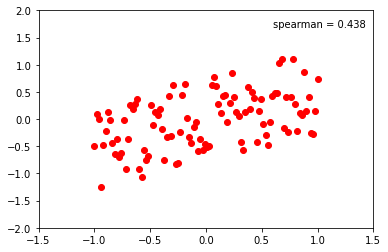

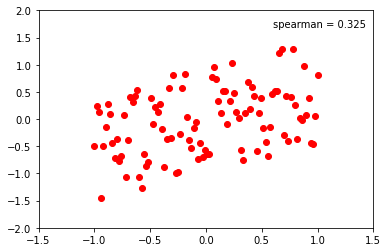

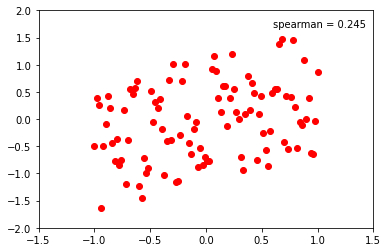

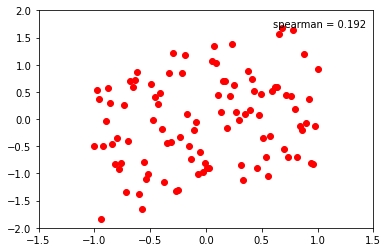

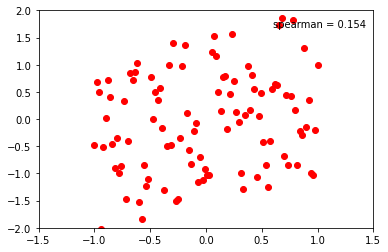

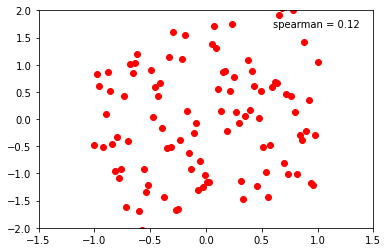

In [ ]:
for p in np.arange(0, 2, 0.2):
    Y = 0.5 * X + p*error
    plt.plot(X, Y, 'ro')
    corr_s, _ = spearmanr(X, Y)
    corr_s = np.round(corr_s, decimals=3)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-2, 2)
    plt.text(0.6, 1.7, 'spearman = ' + str(corr_s))
    plt.show()

#### 6. - Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

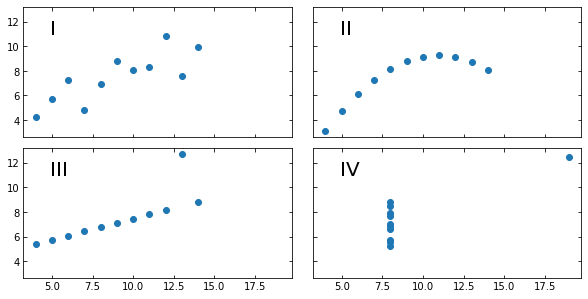

In [ ]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5), 
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

In [ ]:
for label, xy in datasets.items():
    mean = np.round(np.mean(xy[1]), decimals=2)
    print(f'({label}) - Média: {mean}')
    
    var = np.round(np.var(xy[1]), decimals=2)
    print(f'({label}) - Variância: {var}')
    
    corr_p, _ = np.round(pearsonr(xy[0], xy[1]), decimals=2)
    print(f'({label}) - Correlação Pearson: {corr_p}')

    corr_s, _ = np.round(spearmanr(xy[0], xy[1]), decimals=2)
    print(f'({label}) - Correlação Spearman: {corr_s}', end='\n\n')


(I) - Média: 7.5
(I) - Variância: 3.75
(I) - Correlação Pearson: 0.82
(I) - Correlação Spearman: 0.82

(II) - Média: 7.5
(II) - Variância: 3.75
(II) - Correlação Pearson: 0.82
(II) - Correlação Spearman: 0.69

(III) - Média: 7.5
(III) - Variância: 3.75
(III) - Correlação Pearson: 0.82
(III) - Correlação Spearman: 0.99

(IV) - Média: 7.5
(IV) - Variância: 3.75
(IV) - Correlação Pearson: 0.82
(IV) - Correlação Spearman: 0.5



Pela análise dos _datasets_ acima, pode-se perceber que, apesar de muito diferentes, a média, variância e correlação de Pearson possui o mesmo valor. A única métrica de análise que variou conforme o _dataset_ foi a correlação de Spearman. 